<a href="https://colab.research.google.com/github/qlqqqk/Aiffel_prac/blob/main/EXP/%5BE_12%5DOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 프로젝트

### 테서렉트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install keras-ocr
!pip install pytesseract
!pip install Pillow==9.0.0
!sudo apt install tesseract-ocr-kor

In [ ]:
import keras_ocr
import pytesseract
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()
import cv2

import os
from PIL import Image
from pytesseract import Output

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
0.9.1
0.3.9


In [ ]:
image_dir = '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/'
kor_image_dir = glob(image_dir+'kor*')
eng_image_dir = glob(image_dir+'eng*')
mix_image_dir = glob(image_dir+'mix*')

images = glob(image_dir+'*')[:21]
images.sort()
images

['/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_article22319_formallletter.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_cursive.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_galaxy.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_int_mix.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_intern.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_package_design.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_sign_small.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_test_1.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_test_post.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_advertise.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_calligraphy.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_garudians.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_map_test.jpg',
 '/content/drive/MyDrive/Aiffel/data/EXP1

In [ ]:
#한국어만 있는 사진
kor_image_dir

['/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_garudians.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_test_image.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_map_test.jpg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_test_sider.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_calligraphy.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_advertise.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_subtitle.png',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_subtitle2.png']

In [ ]:
#영어만 있는 사진
eng_image_dir

['/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_test_1.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_test_post.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_galaxy.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_article22319_formallletter.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_sign_small.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_int_mix.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_cursive.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_package_design.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_intern.jpeg']

In [ ]:
#섞여있는 사진
mix_image_dir

['/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/mix_test.jpg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/mix_test2.jpeg',
 '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/mix_book1.jpg']

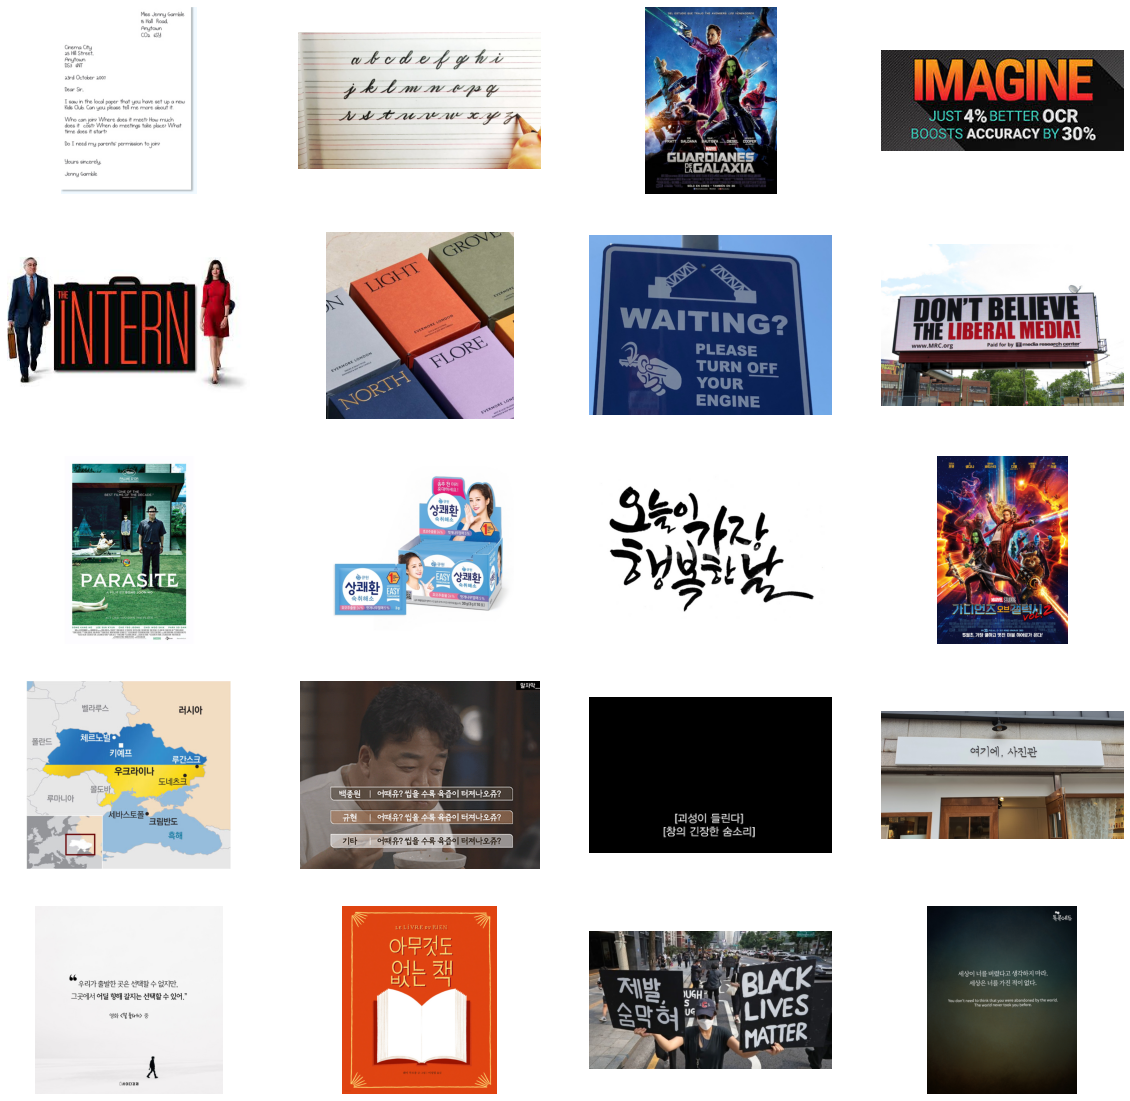

In [ ]:
plt.figure(figsize=(20,20))

for idx, im in enumerate(images):
    plt.subplot(5, 4, idx+1)
    im = img.imread(im)
    plt.imshow(im)
    plt.axis('off')

### kears-ocr

In [ ]:
images_keras_ocr = [ keras_ocr.tools.read(im) for im in eng_image_dir]
prediction_groups = [pipeline.recognize([im]) for im in eng_image_dir]

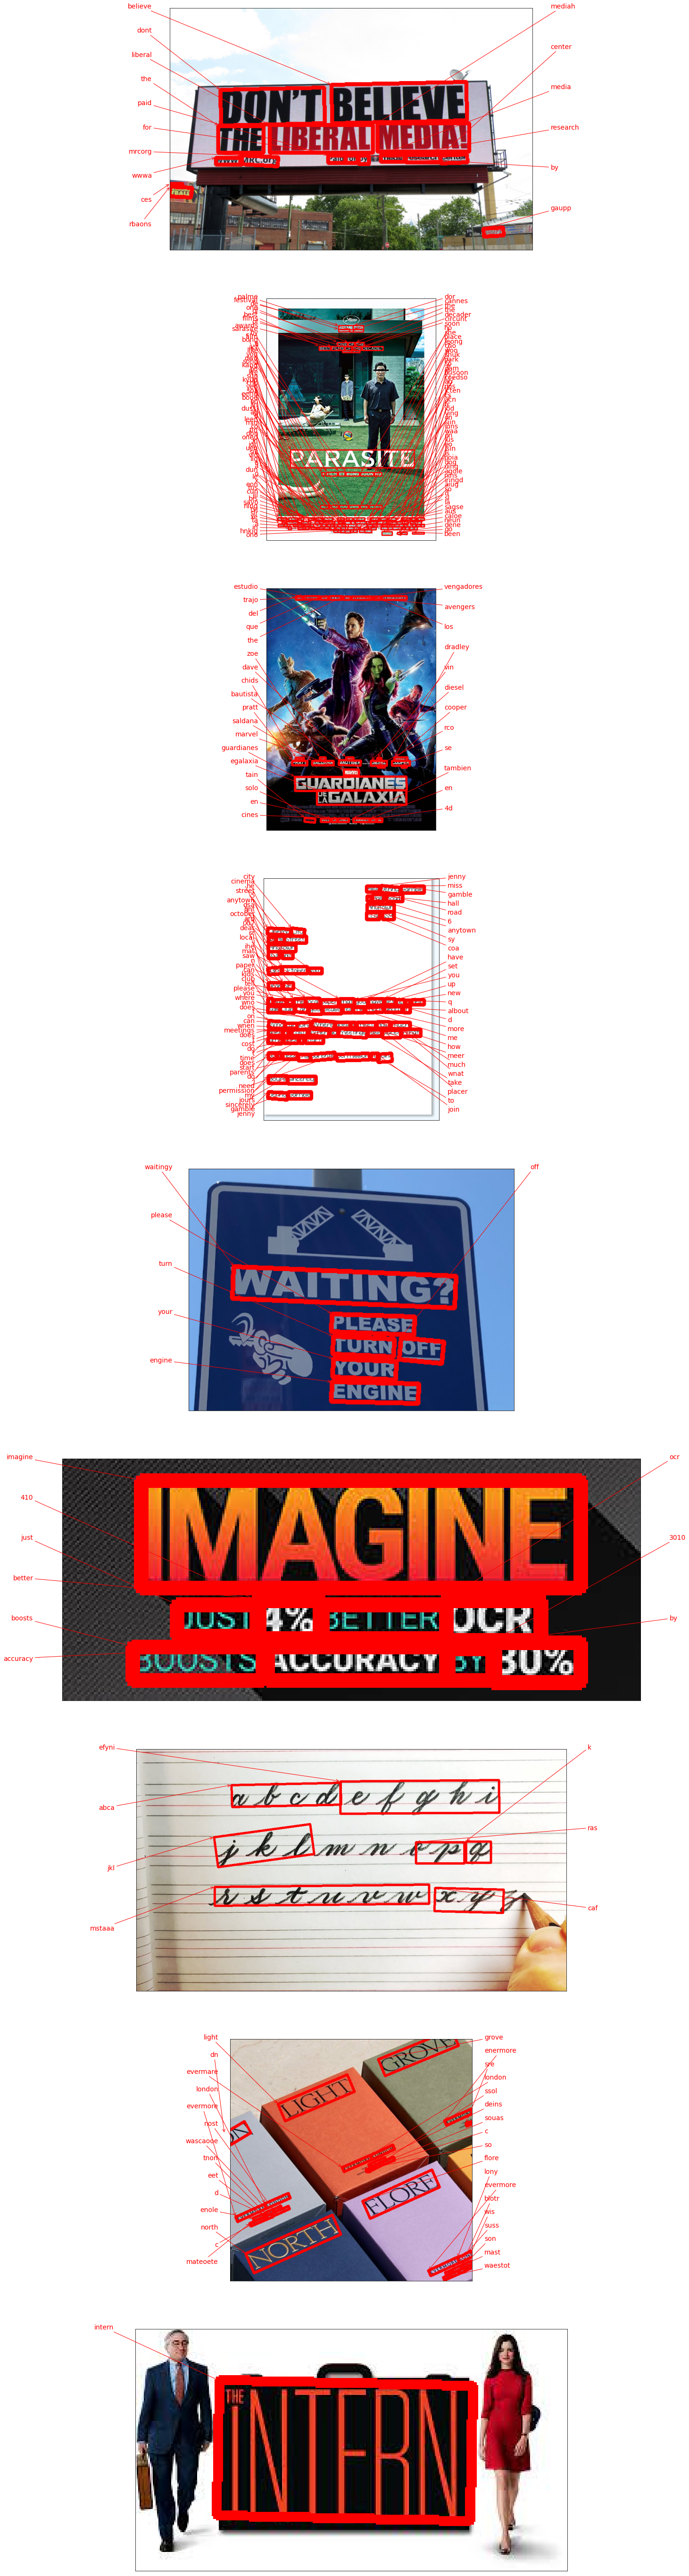

In [ ]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(eng_image_dir), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_keras_ocr[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## Tesseract

In [ ]:
%%capture
def kor_crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []

    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            # print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = '/content/drive/MyDrive/Aiffel/data/sample/'
img_file_path = '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/kor_garudians.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = kor_crop_word_regions(img_file_path, work_dir)

In [ ]:
%%capture
def kor_recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 6'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
kor_recognize_images(cropped_image_path_list)

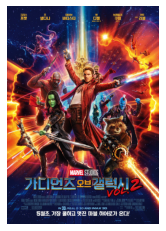

기  0 ㅣ 고 걱
00" 개  「    0, 2>식 .  ”
00 오우  ^  '
<. 0 ~”
= ㆍ  01  (」 뽀 > ~
가골그| 1 소오
1, 30    보혈.
"     고  느  6, |
호    %\      그 사즈 거 「
    이 0   (> 0,
6800
다  도 〉  ~   .
00, ㄴㄴㄴ 0 해
『 . 가디번스며갤랙시  '
“시 이아 온-  가나 6 느
아내 00001 00006
~   나 토가매로 아아이소 기  조기 10
 ㆍ.  5원조 기장 쿨아고 멋진 마블 이어로가 온대

Done
------------------------------------------


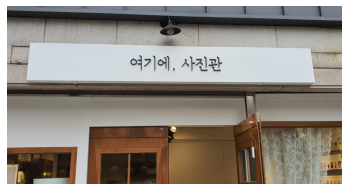

^  …………시시서셔시세서새서서저저저저서저저서져제제져져셔저져셔지저지제시재지지

60000 0000 오         코토      고 제   열도       )        1        1  뉴
6                               ]에 $    } 0                       반오오이아 이아
[것  [것                       ㅣ         ? [1 |
|                            Ｌ                            ' | 개 가 사노 「 주 : 개   @-
|                    ㄷ                 어이 이 이발 0
|         0= ㅣ           1 | 본 의 니: 때 -
로                         =         ㅣ  ㅣ   에: 6 이 0
|       |        8             열릴 이이 이
를            100   에 + 4  ㄱ 미미키빌|


|

헤|



Done
------------------------------------------


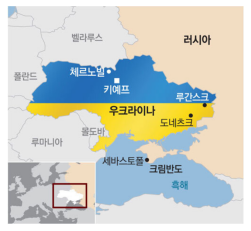

릴라두스

러시아

루마니아

폴란드
몰도바
루마니아

포포


세바스토폼

『
크림

반

도

을해


Done
------------------------------------------


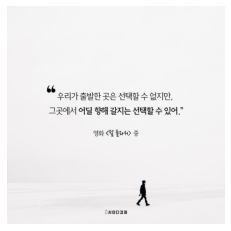

|]

나

0)|

나

느 |

Done
------------------------------------------


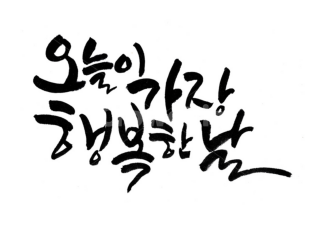

는스아(2
2눈키한

Done
------------------------------------------


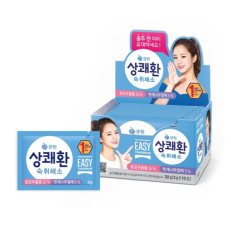

전 미리


로.

7 져

.해나무열매 ㄷ

개

67

10븐썬울가

09 드시고

[개
소이 아별
@구인   6ㄷㆍ
상쾌환 1
ㅇ0 "과
숙취하소 세 ~
효모주출물269: 핫가나무열애 5.    5
"^ 4
-
~,
      ~     1
오며          19상쾌환" |
상쾌화 2==색  을 스스  비01
요 겨페 키 랬   아사
숙취해소 가을 .999혀디2659492버630939000되 1
오어]

0 구더드변도040 30 0(36%10

포]

휴대아세요!
@외   0
7 로 |
이래
은 을 기20 호  해
"    그   「
5 ~ 가 에그  소인
사코 [기       겨    숙취해소  /
과오   1”
다 ~“
숙취해소        그 버타메1295594909444.30909700피 “;
 :

Done
------------------------------------------


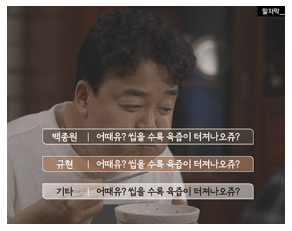

기타

1

때


노르
- 개    <, ,
백종원 ㅣ 어때유?십을 수록 육즘이 타져나오쥬?
}현 ㅣ 어때유?십을 수록 육즘이 터져나오쥬?
2
. 기타  어때유? 썸을 수록 육즘이 터져나오쥬?
,     으으

도
백종원 ㅣ 어때유?십을 수록 육즘이 터저나오류?
^
기타 ㆍ 어때유?십을 수록 육즘이터져나오쥬?
으르

7

씬

을

수통

유스

노르
- 개    <, ,
백종원 ㅣ 어때유?십을 수록 육즘이 타져나오쥬?
}현 ㅣ 어때유?십을 수록 육즘이 터져나오쥬?
2
. 기타  어때유? 썸을 수록 육즘이 터져나오쥬?
,     으으


| 터

적

나

오

수

7



가오

Done
------------------------------------------


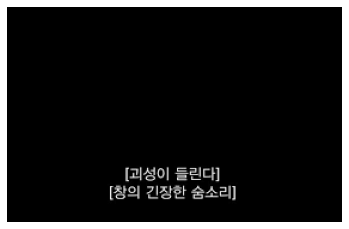


피

성

',

들린다]
고

던른

거기!

숨소리]


Done
------------------------------------------


In [ ]:
for i in kor_image_dir:
  # work_dir = i[:-5]+'/'
  img_file_path = i
  
  im = img.imread(img_file_path)
  plt.imshow(im)
  plt.axis('off')
  plt.show()
  cropped_image_path_list = kor_crop_word_regions(img_file_path, work_dir)
  kor_recognize_images(cropped_image_path_list)
  print('------------------------------------------')

In [ ]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            # print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = '/content/drive/MyDrive/Aiffel/data/sample/'
img_file_path = '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/eng_int_mix.jpeg'  #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

In [ ]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 6'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

PALME

oue)=

aa fa

San
a SS :
aa ls
PALME D'OR i
FESTIVAL DE CANNES
“ONE OF THE Sa
Yc Re) ate ler Vy =a y
= atic ees -—_-
E ee ‘ ‘)
= NE I
py hae
E ae, wm VI
y aA 4 2 .
= | i Ae sf
. Hae | Y =)
atin * Re / sf
A Se fs ~
4 ES. | a). |
z a 7) =
5 i i  —!
S x “\ & iS
 A\SFaNweee 4
—___ " vi a
ae
ra xy oa ae Rages Re ead | eh
iS Rr aig gee =< a | | Ls oe
+ Ore ee (ocean eee
c IS ae a oraree FS eee
A FILM BY BONG JOON HO
. a
ACT LIKE*YOU-OWN THE PLACE
SONG KANG HO LEE SUN KYUN CHO YEO JEONG CHO! WOO SHIK PARK SO DAM
EIN 6d ENTERTRANMENT vee BARENGUN 1 encom BONG JOO He PARASITE SUMS TANG HO LEE SUN YUN CHD YED JEONG CHOL WOO SAN PARESO QAM LEE JUNG EEN CHANG RYAE UM “SEONG JOOK HO
BONS 200K 80 "RONG JOON HE AN IN WON “PCNA SONA MOON YING KOM SY AED WON HED SSREIM MYUNG KYDIN PSSELEE SON YOUNG seccoJANG YOUNG HAIN SSUSRONG KYUNG P40
SPLEE HA AIM ZSCHOISE YEON icSHIM SEQ YOUNG “EQUNG JEU I Sl Sus L NG a : cate JUNG "SESRUANG AYE YOUNG PI JUNG DD AHN PARK KYUNG $20
WAL TAE YONG HNANG HYD K

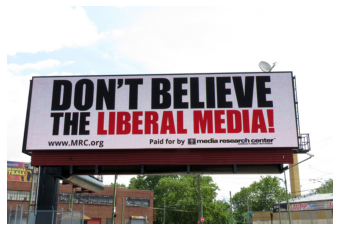

THE LIBERAL MEDIA!
www.MRC.org Paid for by Klimedia research center”
ti
sa =
EE See
rey Mes ne Sead pees =
77a | +! |e ite a ea
is me ae oe
— uae || Vee ee |

Done
------------------------------------------


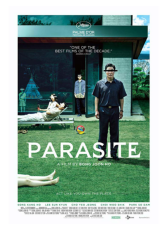

PALME

oue)=

aa fa

San
a SS :
aa ls
PALME D'OR i
FESTIVAL DE CANNES
“ONE OF THE Sa
Yc Re) ate ler Vy =a y
= atic ees -—_-
E ee ‘ ‘)
= NE I
py hae
E ae, wm VI
y aA 4 2 .
= | i Ae sf
. Hae | Y =)
atin * Re / sf
A Se fs ~
4 ES. | a). |
z a 7) =
5 i i  —!
S x “\ & iS
 A\SFaNweee 4
—___ " vi a
ae
ra xy oa ae Rages Re ead | eh
iS Rr aig gee =< a | | Ls oe
+ Ore ee (ocean eee
c IS ae a oraree FS eee
A FILM BY BONG JOON HO
. a
ACT LIKE*YOU-OWN THE PLACE
SONG KANG HO LEE SUN KYUN CHO YEO JEONG CHO! WOO SHIK PARK SO DAM
EIN 6d ENTERTRANMENT vee BARENGUN 1 encom BONG JOO He PARASITE SUMS TANG HO LEE SUN YUN CHD YED JEONG CHOL WOO SAN PARESO QAM LEE JUNG EEN CHANG RYAE UM “SEONG JOOK HO
BONS 200K 80 "RONG JOON HE AN IN WON “PCNA SONA MOON YING KOM SY AED WON HED SSREIM MYUNG KYDIN PSSELEE SON YOUNG seccoJANG YOUNG HAIN SSUSRONG KYUNG P40
SPLEE HA AIM ZSCHOISE YEON icSHIM SEQ YOUNG “EQUNG JEU I Sl Sus L NG a : cate JUNG "SESRUANG AYE YOUNG PI JUNG DD AHN PARK KYUNG $20
WAL TAE YONG HNANG HYD K

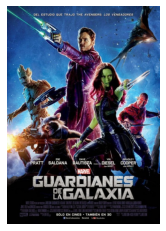

ae : a ;
aE i? r 3 4 Le,
CSUs, ji cE JP at:
A a ai
" an Je a ¥
l\- .
” : fy \i Ua
Vie + Dee
en Lp k MW f oe
 4£0S7? Bee at ;
jf tae Bie > oe
com Ae Kame i
ae gle J EN. ]
Thee > aS
+. ie a) y
‘ < 3 eae vw nS y
PRATT SALDANA BAUTISTA \DIESEL COOPER)
| [2a we
a a po EEF, ae i ne = = — ae

* .

yao
yl

ea

eae ae ee a
oo Na
GUARDIANE
De AL AWE

Dancer

®

VANE

ay. 4

TAN

seat Aathdincecrtng tastier tana


Done
------------------------------------------


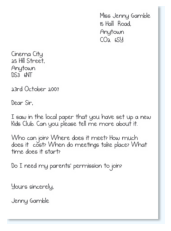

Mice

Jenn

Garnboe.

5

Hall

Road.

Ainutour

CO»

LSU

nemo

City

a’

Het

Street,

Arniytown

is3

IN|

23rd

Oe tober

aOQOT

Near

Sr.

L

BOUL)

7)

tie.

local

paper

tnat

UO

nave.

set

Up


Pee

Kids

Chub.

Carn

YOu

please.

tell

ry ye.

rrore

About


VVino

cary,

ore

VVhere.

does

it

ryyeet?

Mow

much

does

rT

cost?

When

AO

meetings

take.

place?

VVhat

trre.

does

(Tt

start?

Do

L

need

rT Y4

parents’

DETTYySsior

To

rr

Yours

sincerely,

Jenn

Garrbie.

tt

Done
------------------------------------------


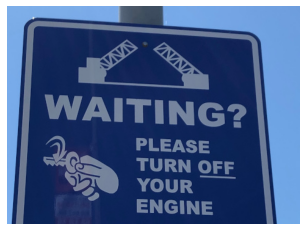

WAITING?

PLEASE


ENGINE

WAITING?
ey ree
> Wet
? ENGINE

“S

paola

(>
<)>

aa

Done
------------------------------------------


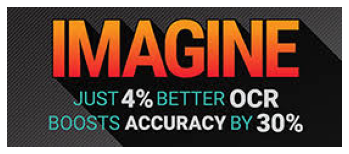

IMAGINE

JUST

a%

>) eea

OCR

BOOSTS

ACCURAC

a

30%

Done
------------------------------------------


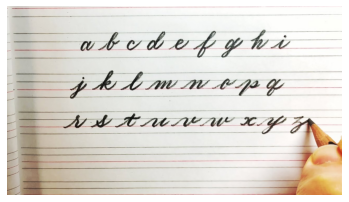


a wate Lee Y WA



pt

A


AD BE FO UOC LY



Sik AAA

Nr.
wy

=

————— el
Se
——————

——




ett i _stss—“(“(CststststsCOCOSOSONOSCOiCiS


Done
------------------------------------------


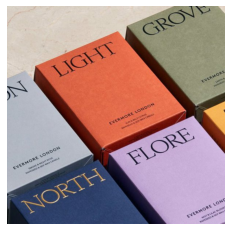

ss \ S o—-*
Se s et con® ~ e
org :

Done
------------------------------------------


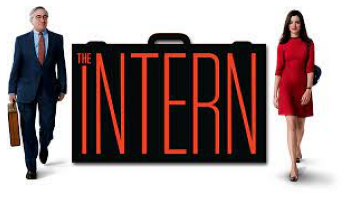


Done
------------------------------------------


In [ ]:
for i in eng_image_dir:
  img_file_path = i
  
  im = img.imread(img_file_path)
  plt.imshow(im)
  plt.axis('off')
  plt.show()
  cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
  recognize_images(cropped_image_path_list)
  print('------------------------------------------')

In [ ]:
def mix_crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor+eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            # print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = '/content/drive/MyDrive/Aiffel/data/sample/'
img_file_path = '/content/drive/MyDrive/Aiffel/data/EXP12_TEST_SET/mix_test.jpg'  #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = mix_crop_word_regions(img_file_path, work_dir)

def mix_recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 6'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor+eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
mix_recognize_images(cropped_image_path_list)

Soe ee
ee Was
We Ts

Done


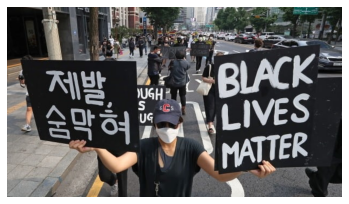

Soe ee
ee Was
We Ts

Done
------------------------------------------


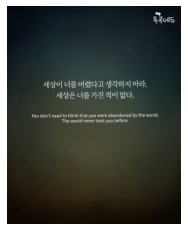


LS

Zo

듀

이셔

| 너를 버렸

Ch A

NA oy 48) a

세상은 너

=

진 적이 없다.

You don’tn

eed to think

tare oleate

bandoned by the world.

The world ne

ver took you before.

Done
------------------------------------------


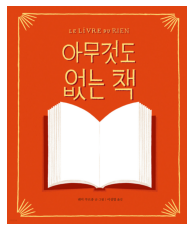


떼어

LIVRE

누대

Rel HN:

|

아무것도

=

saxon)

Ee yl
Ole an

|                                                                             「

|                                                                              !

|                                                                              4

|                                                                              f
레미 쿠르종 글그림 | 이성엽 옮김

Done
------------------------------------------


In [ ]:
for i in mix_image_dir:
  img_file_path = i
  
  im = img.imread(img_file_path)
  plt.imshow(im)
  plt.axis('off')
  plt.show()
  cropped_image_path_list = mix_crop_word_regions(img_file_path, work_dir)
  mix_recognize_images(cropped_image_path_list)
  print('------------------------------------------')

# 회고록
다양한 이미지 종류를 함께 넣어서 효과를 보고 싶었지만, 실제 원하는 만큼의 최소한의 정확도도 달성하지 못했다.
## kears-ocr
- 테서렉트에 비해 정확도는 높은 편에 속했고, 일부 BOX내 글자크기가 크게 차이나면 생략되어버리는 현상도 간혹 있었다. 숫자나 특수문자의 경우 최대한 비슷하게 생긴 영어 스펠링으로 변해버리는 현상도 확인할 수 있었다.
## Tesseract
- 이미지 형태에 따라서 텍스트를 정확하게 인식하는 정도가 달랐지만 psm 6이 평균적으로 성능이 가장 좋았다. 다만 일부러 output이 좋도록 쉬운 이미지를 제공했을때도 부정확한 텍스트가 출력되어 출력의 정확도가 좋아지는 기준이 좀 애매하다고 생각하게되었다.
